# Analyse the Popularity of Different Programming Languages over Time

The oldest programming language still in use today is FORTRAN, which was developed in 1957. Since then many other programming languages have been developed. But which programming language is the most popular? Which programming language is the Kim Kardashian of programming languages; the one people just can't stop talking about?

StackOverflow will help us answer this burning question. Each post on Stack OverFlow comes with a Tag. And this Tag can be the name of a programming language.

To figure out which language is the most popular, all we need to do is count the number of posts on Stack Overflow that are tagged with each language. The language with the most posts wins!

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

In [ ]:
import pandas as pd
df = pd.read_csv("QueryResults.csv", names=['DATE', 'TAG', 'POSTS'], header=0)

In [ ]:
df.shape

(1991, 3)

In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


There are total 1991 rows and a3 collumns.

In [ ]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

## Analysis by programming language

The TAG is the name of the programming language. So for example in July 2008, there were 3 posts tagged with the language C#. Given that the TAG serves as our category column, we can count the number of posts per language. we `sum()` the number of posts then we can see how many posts each programming language had since the creation of Stack Overflow.

In [ ]:
df.groupby("TAG").sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


If we use `count()`, we can see how many months of entries per programming language.

In [ ]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning: Working with the Timestamp.

We need to check to format of the `DATE` column.

In [ ]:
type(df["DATE"][1])

str

Let's fix the date format so that it can be more readable. We need to use Pandas to change format from a string to a datetime format.

In [ ]:
df["DATE"] = pd.to_datetime(df["DATE"])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data manipulation: Pivoting the dataframe

In [ ]:
reshaped_df = df.pivot(index = "DATE", columns ="TAG", values = "POSTS" )
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


We realize that some of our data have `NaN` values, which will not be good for later data manipulation, let's change `NaN` value to `0`

In [ ]:
reshaped_df = reshaped_df.fillna(0)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [ ]:
reshaped_df.shape

(145, 14)

In [ ]:
cols = reshaped_df.columns
print(cols)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


Our reshaped dataframe has 145 rows, 14 columns with the column's names listed above. LEt's count the number of entries per column.

In [ ]:
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

They all have 145 entries per column, which matches the number of rows in our reshaped datatframe.

## Data Visualization with Matplotlib

Let's create our charts. We're going to use a library called Matplotlib.

In [ ]:
import matplotlib.pyplot as plt

First, let's change the figure size to a width of 16 and a hegiht of 10.
Then we add labels and limit for x and y axis.


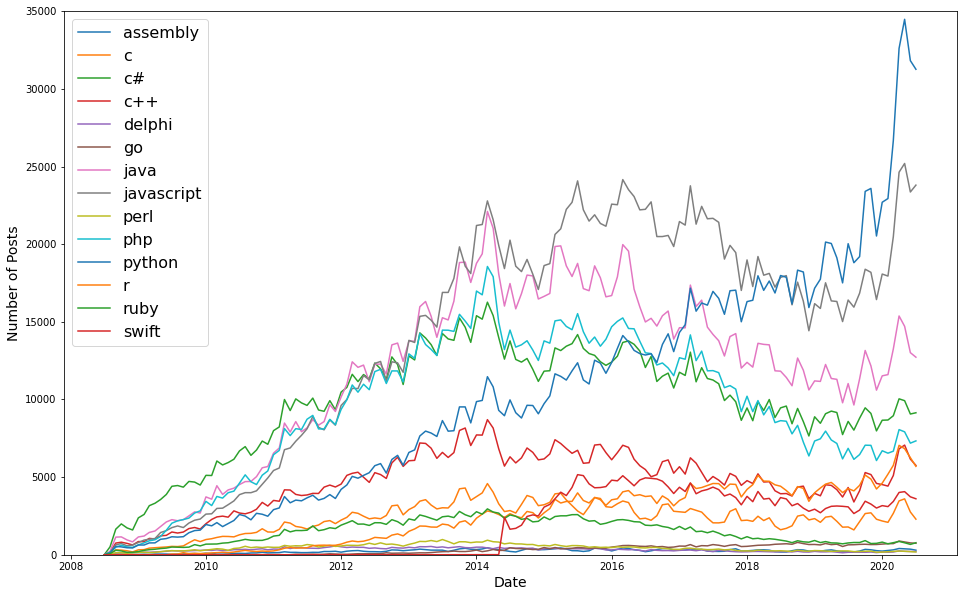

In [ ]:
#change the figsize for better visualization
plt.figure(figsize=(16,10))
#label x and y axis
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
#plot the dataframe (have to plot each line individually so that we can put label)
for col in cols:
  plt.plot(reshaped_df.index, reshaped_df[col], label = col)
#put a legend
plt.legend(fontsize=16)

## Using the OOP approach

Above, we use the functional way of `matplotlib.pyplot` to approach the question. Using the `plt.subplots()` function creates a figure and a set of subplots, and returns a tuple containing a figure object and an array of axis objects. We first have to destructure the figure (`fig`) of the plot and the axes (`ax`). To change the plane, we use `fig`, to change the line we use `ax`.

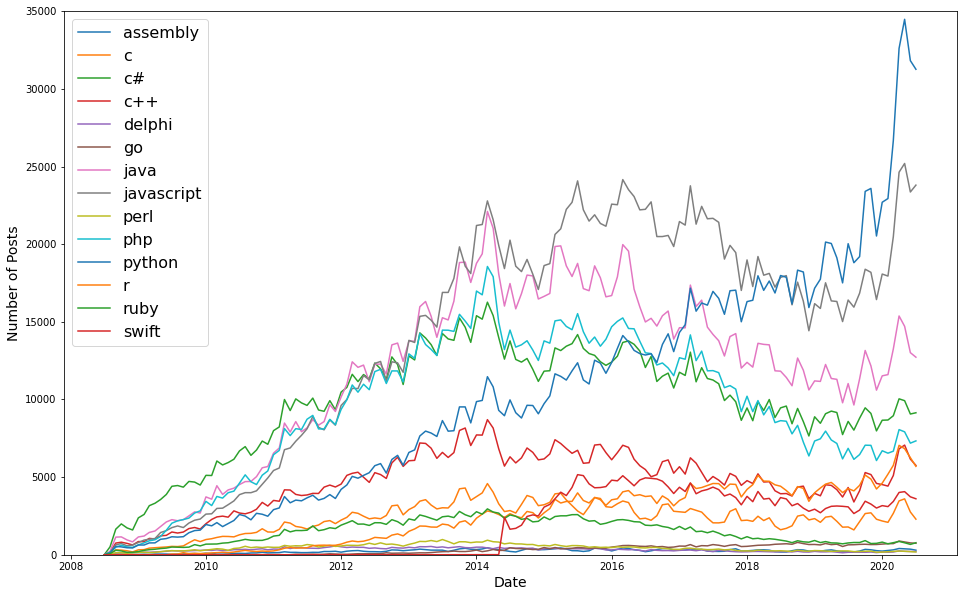

In [ ]:
#destructure fig and ax
fig, ax = plt.subplots(figsize=(16, 10))
#add label with axes functions
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Posts', fontsize=14)
ax.set_ylim(0, 35000)
#plot the dataframe (have to plot each line individually so that we can put label)
for col in cols:
  ax.plot(reshaped_df.index, reshaped_df[col], label = col)
#put a legend
ax.legend(fontsize=16)

## Smoothing out Time-Series Data

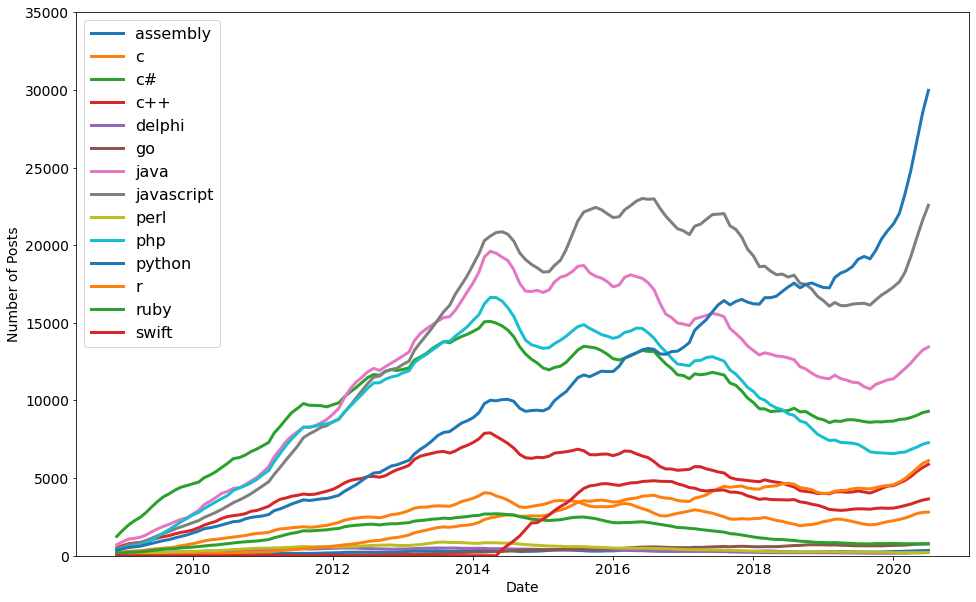

In [ ]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

We can see that Python is now on top yayy good job pytho